In [1]:
# 분석 대상 지역, 연도 선정 근거


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
# import koreanize_matplotlib
import seaborn as sns

popl = pd.read_csv("../data/GDP_data/population_rate.csv", index_col=0)*100
#백분율 -> 퍼센트로 변환
city_list = list(popl[1:].index)
year_list = list(popl.columns)

<Axes: >

/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gly

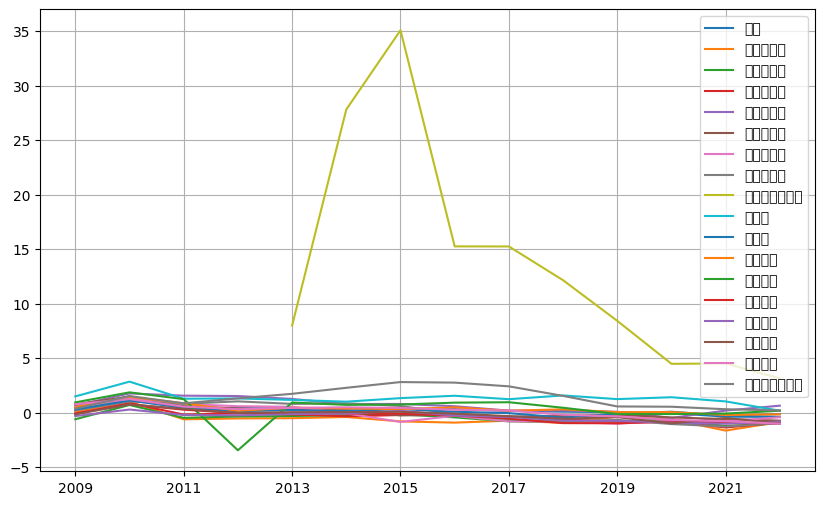

In [2]:
popl.transpose().plot(figsize= (10,6), grid= True)


In [3]:
desc_popl = popl['서울특별시':'제주특별자치도'].describe()
desc_popl
# desc_popl.to_csv("~/Downloads/TIME1.csv", index = True)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,16.000000,16.000000,16.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.316882,1.251342,0.509052,0.130418,0.865468,1.974379,2.371448,1.130024,0.906365,0.535417,0.214800,-0.101284,-0.273052,-0.270395
std,0.530854,0.594287,0.630785,1.142724,1.932138,6.689873,8.469577,3.739492,3.790097,3.093963,2.194093,1.338654,1.411321,1.030978
min,-0.604476,0.286513,-0.609607,-3.450604,-0.506831,-0.398397,-0.850889,-0.913623,-0.801852,-0.958424,-1.011184,-1.045453,-1.644594,-1.016540
25%,-0.080600,0.854409,0.159530,-0.110322,-0.020071,-0.072988,-0.159800,-0.263142,-0.546120,-0.816131,-0.755455,-0.807414,-1.012450,-0.965271
50%,0.253266,1.181017,0.580435,0.158185,0.437018,0.201913,0.317873,-0.089832,-0.321878,-0.457377,-0.338916,-0.623305,-0.582803,-0.732583
75%,0.690302,1.480149,0.859243,0.703340,0.929328,0.792629,0.745585,0.589716,0.193635,0.302302,0.047210,0.051875,-0.083544,0.176787
max,1.490808,2.844630,1.558136,1.524556,7.988189,27.811024,35.073819,15.251987,15.244725,12.147804,8.419870,4.479483,4.514503,3.144974


In [4]:
# 1. 이상점을 갖는 지역 제외

#이상치 분리의 이유: 통계적 방법으로 데이터 분석 시 전체의 평균과 내재된 패턴을 왜곡시킬 가능성이 큼
#통계적 방법으로 이상치 식별 후 원본 데이터로부터 분리
#이상치 조건: IQR(interduartile range)을 고려했을 때,  Q1-1.5*IQR 미만이거나 Q3+1.5*IQR 초과인 값
desc_popl.loc['lower_outlier_max'] = desc_popl.loc['25%'] - 1.5*(desc_popl.loc['75%']
                                                                 -desc_popl.loc['25%'])
desc_popl.loc['upper_outlier_min'] = desc_popl.loc['75%'] + 1.5*(desc_popl.loc['75%']
                                                                 -desc_popl.loc['25%'])

df_outlier = pd.DataFrame(0, city_list, ['outlier'])
for city in city_list:
    outlier_count = 0
    for year in year_list:
        if popl.loc[city, year] != np.nan:
            if popl.loc[city, year] < desc_popl.loc['lower_outlier_max', year] or \
            popl.loc[city, year] > desc_popl.loc['upper_outlier_min', year]:
                outlier_count += 1
    if outlier_count >= 4:
        df_outlier.loc[city] = 1
# df_outlier.to_csv("~/Downloads/TIME2.csv")


In [5]:
# 2. 유의미한 변화를 보이기 전의 연도 제외

#서로 유사하게 이동하는 연도 데이터 제외 이유: 해당 분석은 지역 간 인구 변화 차이에 영향을 미치는 요인을 탐구하기 때문
#연도별 표준편차의 값이 전기간 평균보다 크게 나타나는 기간 전까지의 데이터 분리
#표준편차의 산술평균
mean_popl_std = desc_popl.loc['std'].mean()
mean_popl_std

2.613488269040679

In [6]:
#이상점의 데이터가 약 1/3 을 차지하는 자치단체 제외(세종특별자치시, 제주특별자치도)
popl = popl[popl.index != '세종특별자치시']
popl = popl[popl.index != '제주특별자치도']

#지역간 이동 평균 표준편차값이 평균 이하인 연도 제외
popl = popl.drop(columns = ['2009', '2010', '2011', '2012'])

In [7]:
popl


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
전국,0.379190,0.364583,0.392422,0.323850,0.159253,0.091766,0.045927,-0.040189,-0.367003,-0.386862
서울특별시,-0.506831,-0.398397,-0.802238,-0.913623,-0.737014,-0.931308,-0.373924,-0.623305,-1.644594,-0.852688
부산광역시,-0.306600,-0.233414,-0.159800,-0.433949,-0.796792,-0.841340,-0.802336,-0.641360,-1.225432,-0.972069
대구광역시,-0.161875,-0.332749,-0.217987,-0.131520,-0.375359,-0.543868,-0.964266,-0.807414,-1.361840,-0.910576
인천광역시,1.258834,0.792629,0.799522,0.589716,0.185962,0.206882,0.080687,-0.480145,0.188492,0.642354
광주광역시,0.251427,0.201913,-0.249681,-0.202758,-0.370538,-0.302916,-0.196528,-0.439831,-0.582803,-0.732583
대전광역시,0.539689,-0.065370,-0.850889,-0.290036,-0.801852,-0.818185,-1.011184,-0.745015,-0.794531,-0.425477
울산광역시,0.804005,0.855787,0.613609,-0.104812,-0.611787,-0.816131,-0.658000,-1.045453,-1.269787,-0.974419
경기도,1.168672,1.006978,1.333373,1.550588,1.235494,1.578838,1.242725,1.415051,1.031026,0.176787
강원도,0.236119,0.141286,0.327950,0.083833,-0.042816,-0.457377,-0.100450,0.086798,-0.281818,-0.129607


<Axes: >

/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gly

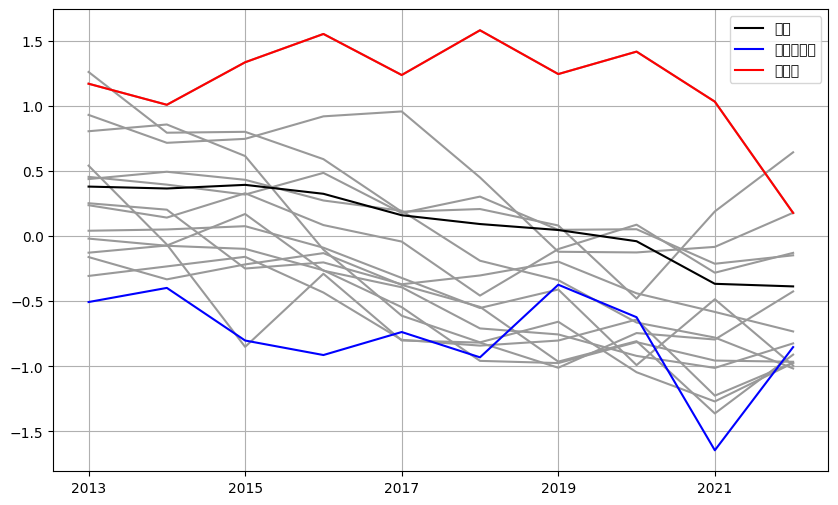

In [8]:
popl[2:].transpose().plot(figsize= (10,6), grid= True, color='0.6', legend = False)
popl.loc['전국'].transpose().plot(figsize= (10,6), grid= True, color='0', legend=True)
popl.loc['서울특별시'].transpose().plot(figsize= (10,6), grid= True, color='b', legend=True)
popl.loc['경기도'].transpose().plot(figsize= (10,6), grid= True, color='r', legend=True)


In [9]:
#분산분석: 편차 제곱의 합(편차: 해당 지역 수치와 전국 평균 수치와의 차)
city_list = list(popl[:-1].index)
year_list = list(popl.columns)

df_ss = pd.DataFrame(0, city_list, ['increase','sum_of_squares'])

for c in city_list:
    ss = 0
    inc = 0
    for y in year_list:
        s = (popl.loc['전국', y]-popl.loc[c,y])**2
        ss += s
        i = popl.loc[c,y]
        inc +=i
        
    df_ss.loc[c] = ss
    if inc > 0: 
        df_ss.loc[c, 'increase'] = 1
    else:
        df_ss.loc[c, 'increase'] = 0

df_ss = df_ss.sort_values(by=['increase', 'sum_of_squares'], ascending=False)
# df_ss.to_csv("~/Downloads/TIME3.csv")

#전기간 인구가 증가한 자치단체 집합 중 전국적 이동 평균과 가장 큰 차이를 보인 경기도
#전기간 인구가 감소한 자치단체 집합 중 전국적 이동 평균과 가장 큰 차이를 보인 서울 

/tmp/ipykernel_24253/258780528.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.54123314830126' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_ss.loc[c] = ss
/tmp/ipykernel_24253/258780528.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.54123314830126' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_ss.loc[c] = ss
